<a href="https://colab.research.google.com/github/penvarict/DOX_Assignments/blob/main/midterm_penvari.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Midterm, Fuel Additive Case Study
**Summary of Answers at the bottom**\
**By Charlie Penvari**

In [1]:
from scipy.stats import f_oneway, norm, normaltest
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd


In [11]:
# I have uploaded the file to colab with the file named as FuelAddits.csv. 
# To rerun this notebook, upload the CSV to the default (/content) directory, and 
# change the file name below. 
fuel_data_frame_raw = pd.read_csv('/content/FuelAddits.csv')
fuel_data_frame_raw

,Unnamed: 0,Additive,Car,Mileage
0,1,2,1,24
1,2,3,1,22
2,3,4,1,23
3,4,5,1,21
4,5,1,2,27
5,6,2,2,24
6,7,4,2,21
7,8,5,2,22
8,9,1,3,24
9,10,3,3,23


**Counts of Data Items**\
b = 5 (the blocks, i.e, the cars)\
n = 20 (total replicants)\
a = 5 (the treatments, i.e, the additives) \

In [3]:
b = 5
n = 20
a = 5

### We want to extract milage data for each additive. We can also analyse the blocks themselves, we extract the milage of each car in the experiment. 

In [4]:
# drop the labesl col, use numpy's labels.

fuel_data_frame_corrected = fuel_data_frame_raw.iloc[:, 1:] 

def extractGroup(frame , colVal, colName = 'Additive'):
  return frame[frame[colName] == colVal]

# extract the mileage data from each respective treatment 
additive1 = extractGroup(fuel_data_frame_corrected, 1)
additive2 = extractGroup(fuel_data_frame_corrected, 2)
additive3 = extractGroup(fuel_data_frame_corrected, 3)
additive4 = extractGroup(fuel_data_frame_corrected, 4)
additive5 = extractGroup(fuel_data_frame_corrected, 5)

# extract the mileage data from each respective block, (the car)
car1 = extractGroup(fuel_data_frame_corrected, 1, colName="Car")
car2 = extractGroup(fuel_data_frame_corrected, 2, colName="Car")
car3 = extractGroup(fuel_data_frame_corrected, 3, colName="Car")
car4 = extractGroup(fuel_data_frame_corrected, 4, colName="Car")
car5 = extractGroup(fuel_data_frame_corrected, 5, colName="Car")

#now with three dataframes, each individually by additive
print(additive1, additive2, additive3, additive4, additive5, sep = '\n')
print()
print(car1, car2, car3, car4, car5, sep = '\n')

    Additive  Car  Mileage
4          1    2       27
8          1    3       24
12         1    4       23
16         1    5       22
    Additive  Car  Mileage
0          2    1       24
5          2    2       24
13         2    4       23
17         2    5       20
    Additive  Car  Mileage
1          3    1       22
9          3    3       23
14         3    4       22
18         3    5       19
    Additive  Car  Mileage
2          4    1       23
6          4    2       21
10         4    3       21
15         4    4       22
    Additive  Car  Mileage
3          5    1       21
7          5    2       22
11         5    3       20
19         5    5       18

   Additive  Car  Mileage
0         2    1       24
1         3    1       22
2         4    1       23
3         5    1       21
   Additive  Car  Mileage
4         1    2       27
5         2    2       24
6         4    2       21
7         5    2       22
    Additive  Car  Mileage
8          1    3       24
9         

### Evaluation of Normality of Data 
### QQ Plot & Histogram

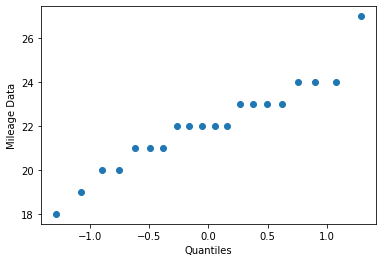

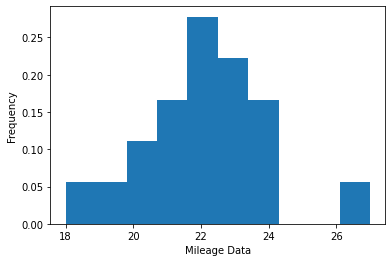

In [5]:

qnorm =norm.ppf(np.linspace(.1,.9 ,num = n))
sorted_milage = np.sort(fuel_data_frame_corrected['Mileage']) 
ideal = qnorm
exp_data = sorted_milage

#configure  QQ plot
qqfig, qqax = plt.subplots()
qqax.scatter(ideal, exp_data)
qqax.set_ylabel("Mileage Data")
qqax.set_xlabel("Quantiles")
plt.show()

# historgram plot 
distfig, distax = plt.subplots()
distax.hist(exp_data, density=True)
distax.set_xlabel("Mileage Data")
distax.set_ylabel("Frequency")
plt.show()


### Normal test for normality of our fuel mileage data. 
This test is based off of the D'Agostino-Pearson normality test. It will work on data sets that have many repeats.  

Note that the D'Agostino-Pearson test has the null hypothesis that the data is drawn from a normal population. As such, a high p-value means that we are confident the data was drawn from a normal population. See: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html 

In [6]:
norm_test = normaltest(exp_data)
print(norm_test[1])

0.4629921548961726


### Box Plot by Treatment

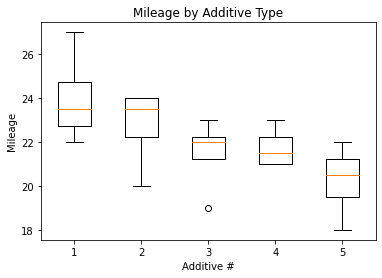

In [7]:
boxfig, boxax = plt.subplots()
boxax.set_xlabel("Additive #")
boxax.set_ylabel("Mileage")
boxax.set_title("Mileage by Additive Type")

boxax.boxplot([additive1['Mileage'], additive2['Mileage'], additive3['Mileage'], additive4['Mileage'], additive5['Mileage']])
boxfig.show()

### Box Plot by Block (Car)

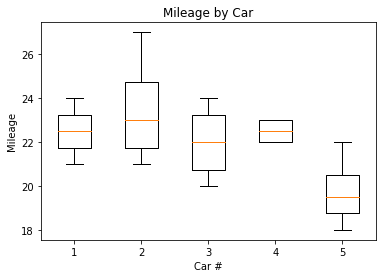

In [8]:
boxfig, boxax = plt.subplots()
boxax.set_xlabel("Car #")
boxax.set_ylabel("Mileage")
boxax.set_title("Mileage by Car")

boxax.boxplot([car1['Mileage'], car2['Mileage'], car3['Mileage'], car4['Mileage'], car5['Mileage']])
boxfig.show()

### Calculate F-Statistic, Comparing Milage by Additive (treatments).





In [9]:
f_oneway(additive1['Mileage'], additive2['Mileage'],additive3['Mileage'],additive4['Mileage'], additive5['Mileage'])

F_onewayResult(statistic=2.62707182320442, pvalue=0.07625403230100856)

### Calculate F-Statistic, Comparing Milage by Car (blocks).

In [10]:
f_oneway(car1['Mileage'], car2['Mileage'], car3['Mileage'], car4['Mileage'], car5['Mileage'])

F_onewayResult(statistic=2.557377049180328, pvalue=0.08181830794068091)

## Summary of Answers


**1. What is the null hypothesis?**\
Any particular fuel additive, specifically the 5 in the experiment, have no meaningful (or significant) effect on the mean of mileages between the 5 cars. Within the context of ANOVA, H_0 (the null hypothesis) is stating that all the treatment means (means of mileage with each additive) are the same. The alternate hypothesis being that at least one mean of mileages for a particualr additive is different. 

**2. Do you accept or reject H0?  To what level of certainty?** \
Given an arbritrary significance level of .05, that is, α = .05 for a one tail f distribution ANOVA test, we cannot reject the null hypothesis. With p = .076, which is larger than .05, we must presume that there is not a significant amount of evidence to show a relationship between fuel additive and mileage. \

A p-value of .076 indicates a 7.6% chance that we would have observed the data that we currently have, assuming that the null hypothesis is true. With a significance level of .05, or rather a 5% chance that we would have observed the data that we have, we want to be 95% sure that the data the we collected wasn't a 'rare' observation.

It is worth mentioning that with a p-value that is low, we can hypothesize that there may be moderate relationship between fuel additive and mileage. The box plot for the additives show that additive 1 and 2 have better mileages than the rest. 3 and 4 look the same, and 5 looks the worst. Depending on what level of significance we want to see, the box-plot and the low p-value of .076 may be good enough to say that there is an effect with respect to fuel additive. 

*But, if we want to be at least 95% confident that there is a relationship, the data in this experiment does not have enough evidence to support that.* 


**3. Is ANOVA a suitable method to analyze the data?  Prove or disprove using plots, calculations, or any other means befitting a data analyst.**\
In the QQ-Plot we can see that the data does follow a linear trend. Further, with the D'Agostino-Pearson normal test, we have a high p-value (p = .46), meaning that we *cannot* reject the null hypothesis that the data comes from a normal distribution. As the data comes from a normal distribution, then we can use ANOVA. \

For the type of experiment that we have, ANOVA is also suitiable. Since we want to see how mileage is affected by fuel additive, accounting for the type of cars, which is the experiment's blocks, ANOVA is a classic tool to use. Also, with a low p-value of .08 for the block effects, it is worth using ANOVA since there is a small but unignorable chance that each car has a differing effect on mileage.  

There is a concern with the sample size for each treatment, or rather, the number of replicants. Not all cars are tested with every additive. Also, a car is only tested once with one additive. As such, we do not have a Randomized Complete Block Designed Experiment. \

Further, because a car is only tested once with one additive, the known but uncontrollable factors can greatly affect the data. This is addressed below.

**4. Do any questions you would have for the experimenters?** \
I would ask, how were the trials run such that known but uncontrollable factors are accounted for? \

For example, ambient temperature affects how efficiently an engine runs. If the trials were not randomized, then running all of trials for particular treatment with on a hot day would not give a accurate view of how well the fuel additive is working. \

A second question I would ask is: how is mileage data actually collected? \
Is a given car driving around a closed circuit until the gas tank is empty? Is the car driving on the street? If so, does it take the same route every run and is traffic accounted for? Also, is there one driver or multiple drivers? 


All the above are important because since there is only one (or zero) replicant for each additive and car combination, then how the experiment is actually carried out becomes more important. 
